## Decision boundary

Let's import the necessary libraries first. And set the format to `.svg`. This is the best format for onscreen viewing.

In [5]:
import numpy as np
from scipy import stats
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
display.set_matplotlib_formats('svg')

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In the SVM algorithm, we try to find a __decision boundary__. Instead of, say, modelling probability distributions for each class, we simply find a line or curve (in two dimensions or multiple dimensions) that separates the classes from each other. 

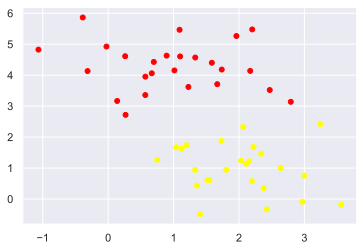

In [76]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, 
                  centers=2,
                  cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn');

A __linear decision boundary__ separates the two data set using a line (or a plane in higher dimension). Points that are on the same side of the line are classified to belong to the same class. 

__Problem 1__. Find a line that separates the two classes and plot it. How many numbers do you need to specify?

__Problem 2__. Is this line unique? Describe the line that would best generalize to new data.

## Support Vector Machine

For a decision boudnary we can define the __margin__ which is defined by the largest distance from the nearest point in the test set. We plot this below

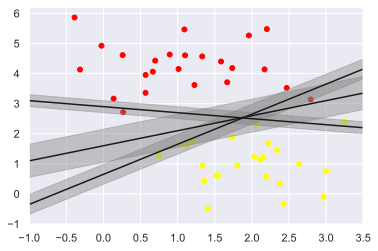

In [67]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    # d is the size of the margin, note that some are wrong
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='gray', alpha=0.4)
    
plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes the margin is the one that is chosen as the decision boundary. We assume that new data would be near our training data. Thus the line which is farthest from the training data would generalize best to test data.

## SVM using sklearn

In [85]:
from sklearn.svm import SVC          # "Support vector classifier"
model = SVC(kernel='linear', C=1e6) # linear decision boundary
model.fit(X, y)                      # training

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Below is a convenience function for visualizing the SVM classifier. 

In [30]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


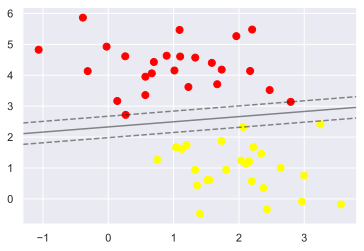

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

__Problem 3__. What is the content of `model.support_vectors_`? In general what does a trailing underscore in attributes in scikit-learn models mean?

__Problem 4__. What is the parameter `C` in `SVC(kernel='linear', C=1e10)` for? Provide experimental justification or cite from the official documentation. What is the relationship between `C` and the margin of the classifier?

__Problem 5__. In this section we explored the SVM for a linearly separable dataset. Of course not all data sets are linearly separable. What is the chance that a dataset is separable? Consider the number of features of a dataset. What is the effect of increasing number of features with the linear separability of the dataset? 

__Problem 6__. (Optional). Evaluate linear separability by generating a uniformly distributed data set for increasing number of features, and using the SVM algorithm for each dataset. Make a plot of the model error (or accuracy) vs number of features.

## Nonlinear Decision Boundaries

__Problem 5__. Consider the following dataset, can we use a linear SVC to classify the two classes?

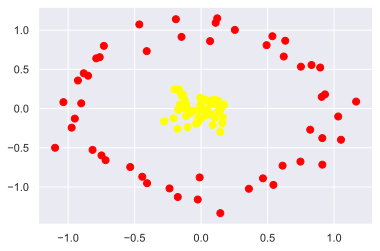

In [68]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

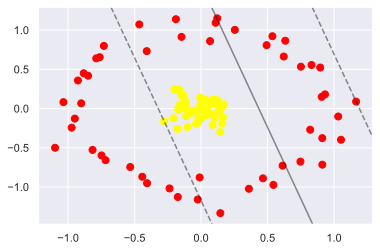

In [58]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(clf);

__Problem 6__. Evaluate the accuracy of the SVM linear classifier for this data set by using a confusion matrix. (HINT: `from sklearn.metrics import confusion_matrix`). Is it good or bad? 

__Problem 7__. Is the dataset linearly separable? Suppose we find a line which separates the training set above, would it generalize well to new data?

We transform the data set by __feature engineering__. That is we create a new feature which would separate the two classes. We define $r  = \exp\left(-(x_1^2 + x_2^2)\right)$ for the data point $(x_1, x_2)$. The inner term $x_1^2 + x_2^2$ is simply the squared distance of the point from the origin. For points far from the origin $r \approx 0$ while $r \approx 1$ for points near the origin. This looks like a good feature for our toy data set. In NumPy we write this as: `r = np.exp(-(X ** 2).sum(axis=1))`


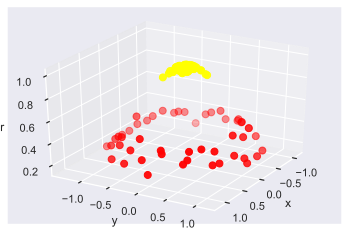

In [71]:
from mpl_toolkits import mplot3d

r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn') # add new data
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

Using linear SVM we can now separate the two classess by the plane by $r = 0.7$. In practice,  data is more complex, and finding a new feature like what we did is difficult. Moreover, computationally costly. This is solved by what is called the _kernel trick_. A fit on the transformed data can be done implicitly that is, without having to build the added dimensions.
(Note that higher dimensionality increases the likelihood of linear separability. However, this is computationally expensive.)
The kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In `sklearn`, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [73]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

__Problem 8__. Fit the classifier and evaluate the accuracy.

This is how it should look like. What beauty.

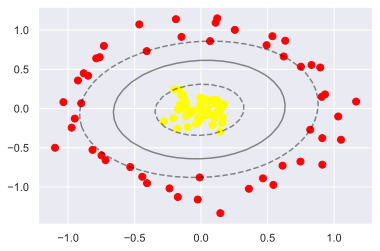

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

__Problem 9__. What are other kernel functions available in `sklearn`? (HINT: There are four.)

__Problem 10.__ What parameter of `sklearn.svm.SVC` can be tweaked  setting parameters to handle unbalanced classes (e.g. unbalanced in importance, or in number)?

## Summary

In this exercise we explored SVMs. These are the advantages of SVMs:

* Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.


* Once the model is trained, the prediction phase is very fast. (Why is this the case? HINT: Consider dot products and angles.)


* Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms. (Curse of dimensionality.)


* SVM with kernel methods are very versatile, and are able to adapt to many types of data set, linearly separable or not.


However, SVMs have several disadvantages as well:

* The scaling with the number of samples $n$ is $\mathcal{O}(n^3)$ at worst, or $\mathcal{O}(n^2)$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.


* Good results strongly depends on a suitable choice of the softening parameter $C$. This can be chosen empirically using [cross-validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), but this can be expensive as datasets grow in size! (Cross-validation requires passing through the dataset multiple times.)


* The results do not have a direct probabilistic interpretation.


## Reference

Wnxr InaqreCynf, Clguba Qngn Fpvrapr Unaqobbx. 2016. The text is released under the CC-BY-NC-ND license, and code is released under the MIT license.